# 01. Exploratory Data Analysis

In [3]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load processed training dataset

In [4]:
training_set = pd.read_parquet("datasets/processed/training_set_processed.parquet")
training_set

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals
7102,00-01,CHN1,2000-03-19,Dalian Haichang,Beijing Guoan,2,0,2,W,2
7103,00-01,CHN1,2000-03-19,Qingdao,Shanghai Greenland,1,1,0,D,2
7108,00-01,CHN1,2000-03-19,Xiamen Xiaxin,Liaoning,3,0,3,W,3
7106,00-01,CHN1,2000-03-19,Shenzhen FC,Sichuan Guancheng,0,0,0,D,0
7105,00-01,CHN1,2000-03-19,Guangzhou Rich and Force,Chongqing Lifan,0,0,0,D,0
...,...,...,...,...,...,...,...,...,...,...
299041,22-23,TUN1,2023-02-08,EO Sidi Bouzid,ES Metlaoui,3,4,-1,L,7
299040,22-23,TUN1,2023-02-08,ES Sahel,CA Bizertin,0,2,-2,L,2
299039,22-23,TUN1,2023-02-08,US Ben Guerdane,Soliman,2,2,0,D,4
299037,22-23,TUN1,2023-02-08,Stade Tunisien,US Tataouine,2,1,1,W,3


### Seasons analysis

In [40]:
# Number of games per season
seasons = training_set["Sea"].value_counts().index.tolist()
season_games = training_set["Sea"].value_counts().tolist()
season_games_df = pd.DataFrame({"Season": seasons, 
                                "Number of Games": season_games})
season_games_df
# season_games_df.to_csv("datasets/subsets/season_games.csv", index=None)

,Season,Number of Games
0,14-15,15472
1,16-17,15459
2,13-14,15358
3,12-13,15268
4,21-22,15241
5,18-19,15203
6,11-12,15152
7,15-16,15145
8,17-18,15017
9,20-21,14433


In [89]:
STATS_COLUMNS = ["Sea", "HS", "AS", "GD", "Goals"]
# Statistics per season
df_by_season = training_set[STATS_COLUMNS].groupby("Sea").sum()
df_by_season
# df_by_season.to_csv("datasets/subsets/stats_by_season.csv", index=None)

,HS,AS,GD,Goals
Sea,,,,
00-01,12783,9117,3666,21900
01-02,12956,9360,3596,22316
02-03,13486,10017,3469,23503
03-04,14481,10605,3876,25086
04-05,16063,11779,4284,27842
05-06,16567,12420,4147,28987
06-07,17449,13009,4440,30458
07-08,18677,13756,4921,32433
08-09,19789,14651,5138,34440


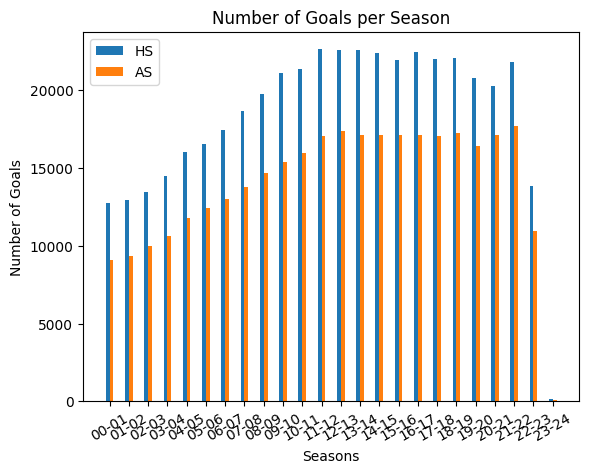

In [79]:
X_axis = np.arange(len(seasons))

plt.bar(X_axis - 0.1, df_by_season["HS"].to_list(), 0.2, label = 'HS')
plt.bar(X_axis + 0.1, df_by_season["AS"].to_list(), 0.2, label = 'AS')
  
plt.xticks(X_axis, X, rotation=30)
plt.xlabel("Seasons")
plt.ylabel("Number of Goals")
plt.title("Number of Goals per Season")
plt.legend()
plt.savefig("figures/GoalsPerSeason_2.png")

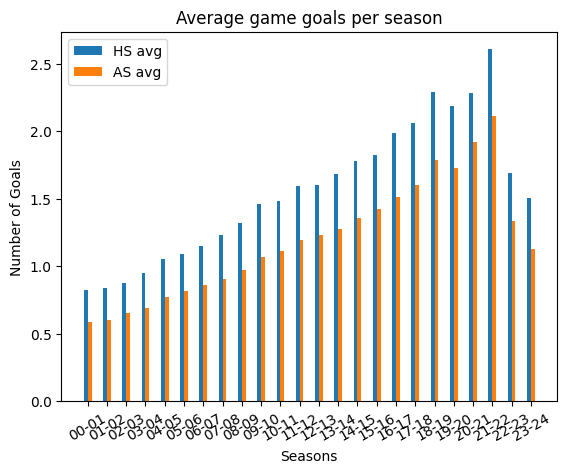

In [93]:
X_axis = np.arange(len(seasons))

plt.bar(X_axis - 0.1, [i/j for i, j in zip(df_by_season["HS"].to_list(), season_games)], 
        0.2, label = 'HS avg')
plt.bar(X_axis + 0.1, [i/j for i, j in zip(df_by_season["AS"].to_list(), season_games)], 
        0.2, label = 'AS avg')
  
plt.xticks(X_axis, X, rotation=30)
plt.xlabel("Seasons")
plt.ylabel("Number of Goals")
plt.title("Average game goals per season")
plt.legend()
plt.savefig("figures/GoalAvg_Season_2.png")

### Seasons with most and least goals

In [64]:
def stats_by_season(stats_col):
    '''Retrieves season with most and least (stat) and the max/min stat.
    
    Args:
        - stat_col: column to extract max/min season
    '''
    
    if stats_col in df_by_season.columns:
        
        max_season = df_by_season[[stats_col]].idxmax()[0]
        max_stat = df_by_season[[stats_col]].max()[0]
        min_season = df_by_season[[stats_col]].idxmin()[0]
        min_stat = df_by_season[[stats_col]].min()[0]
        
        print(f"Season with most {stats_col}: {max_season} "
              f"({max_stat} goals)")
        print(f"Season with least {stats_col}: {min_season} "
              f"({min_stat} goals)")
        
        return max_season, max_stat, min_season, min_stat
    
    else:
        raise ValueError("Column not in df_by_season")

In [94]:
stats_by_season("HS")
stats_by_season("AS")
stats_by_season("Goals");

Season with most HS: 11-12 (22626 goals)
Season with least HS: 23-24 (152 goals)
Season with most AS: 21-22 (17704 goals)
Season with least AS: 23-24 (114 goals)
Season with most Goals: 12-13 (39937 goals)
Season with least Goals: 23-24 (266 goals)


### Win / Draw / Loss analysis

In [95]:
total_matches = training_set.shape[0]
print(f"Number of games in training set: {total_matches}")

# Home wins
home_wins = training_set["WDL"].value_counts()["W"]
home_wins_percentage = round(100 * home_wins / total_matches, 3)
print(f"Number of home wins: {home_wins} ({home_wins_percentage} %)")

# Draws
draws = training_set["WDL"].value_counts()["D"]
draws_percentage = round(100 * draws / total_matches, 3)
print(f"Number of draws: {draws} ({draws_percentage} %)")

# Away wins
away_wins = training_set["WDL"].value_counts()["L"]
away_wins_percentage = round(100 * away_wins / total_matches, 3)
print(f"Number of away wins: {away_wins} ({away_wins_percentage} %)")

Number of games in training set: 299207
Number of home wins: 134167 (44.841 %)
Number of draws: 80871 (27.028 %)
Number of away wins: 84169 (28.131 %)


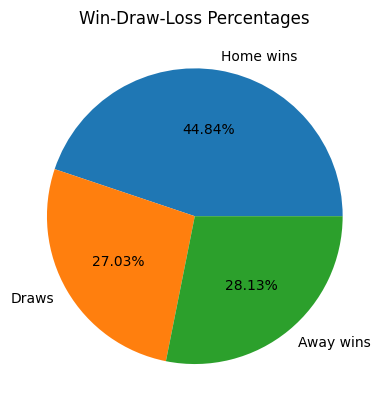

In [96]:
fig, ax = plt.subplots()

labels = "Home wins", "Draws", "Away wins"
ax.pie([home_wins, draws, away_wins], labels=labels, autopct='%1.2f%%');
plt.title("Win-Draw-Loss Percentages")
plt.savefig("figures/WDL_percentages.png")

### Goals analysis

In [97]:
home_goals = training_set["HS"].sum() 
print("Total goals scored by home teams:",home_goals)
away_goals = training_set["AS"].sum()
print("Total goals scored by away teams:",away_goals)
total_goals = training_set['Goals'].sum()
print(f"Total goals in {total_matches} games in training set: {total_goals}")
print(f"Average goals by match: {round(total_goals / total_matches, 3)}")

Total goals scored by home teams: 440343
Total goals scored by away teams: 335543
Total goals in 299207 games in training set: 775886
Average goals by match: 2.593


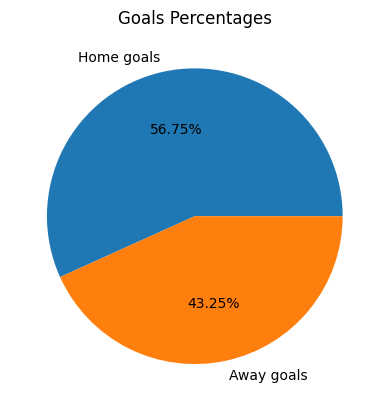

In [98]:
fig, ax = plt.subplots()

labels = "Home goals", "Away goals"
ax.pie([home_goals, away_goals], labels=labels, autopct='%1.2f%%');
plt.title("Goals Percentages")
plt.savefig("figures/Goals_percentages.png")

In [101]:
avg_home_goals = round(training_set["HS"].mean(), 5)
avg_away_goals = round(training_set["AS"].mean(), 5)
avg_goal_difference = round(training_set["GD"].mean(), 5)
print(f"Average goals by home team: {avg_home_goals}")
print(f"Average goals by away team: {avg_away_goals}")
print(f"Average goal difference: {avg_goal_difference}")

Average goals by home team: 1.4717
Average goals by away team: 1.12144
Average goal difference: 0.35026


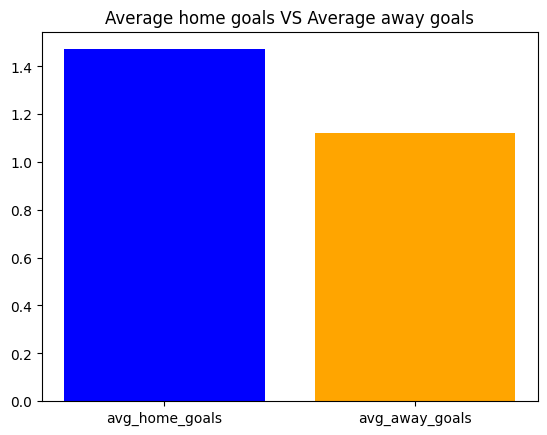

In [105]:
plt.bar(["avg_home_goals", "avg_away_goals"], 
        height=[avg_home_goals, avg_away_goals], color=["blue", "orange"]);
plt.title("Average home goals VS Average away goals");
plt.savefig("figures/AvgHomeGoals_vs_AvgAwayGoals.png")

### List of teams in training set

In [25]:
# Load teams data statistics from pickle file
with open("teams.pickle", "rb") as teams_file:
    teams = pickle.load(teams_file)

In [45]:
def search_match(df, team1, team2):
    condition_a = ((df["HT"] == team1) & (df["AT"] == team2))
    condition_b = ((df["HT"] == team2) & (df["AT"] == team1))
    return df.loc[condition_a | condition_b]

In [47]:
search_match(training_set, "Real Madrid", "Eibar")

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals
174450,14-15,SPA1,2014-11-22,Eibar,Real Madrid,0,4,-4,L,4
174640,14-15,SPA1,2015-04-11,Real Madrid,Eibar,3,0,3,W,3
189935,15-16,SPA1,2015-11-29,Eibar,Real Madrid,0,2,-2,L,2
190122,15-16,SPA1,2016-04-09,Real Madrid,Eibar,4,0,4,W,4
212361,16-17,SPA1,2016-10-02,Real Madrid,Eibar,1,1,0,D,2
212545,16-17,SPA1,2017-03-04,Eibar,Real Madrid,1,4,-3,L,5
219409,17-18,SPA1,2017-10-22,Real Madrid,Eibar,3,0,3,W,3
219593,17-18,SPA1,2018-03-10,Eibar,Real Madrid,1,2,-1,L,3
224852,18-19,SPA1,2018-11-24,Eibar,Real Madrid,3,0,3,W,3
225032,18-19,SPA1,2019-04-06,Real Madrid,Eibar,2,1,1,W,3


In [ ]:
def get_last_n_matches_result(team_name, n_previous_matches):

    team_df, _, _= extract_team_df(team_name)
    last_n_games_df = team_df[-n_previous_matches:]

    return last_n_games_df